## Highway paths - Are players biased?

What paths do Wikispeedia players most follow? Are there "highway paths" that are very often used between 2 countries?

We want to focus on intermediate paths between articles, not only on first and last articles of a game path to gain insight on players behaviours.

Method
- Extract each game path from paths_finished.csv and paths_unfinished.csv as a list
- Create a new list with every 1-unit long path between articles (returns to previous articles '<' should be removed!)
- Convert the list of pairs into a Pandas DataFrame and counts the number of time that each pair appear using .value_counts()
- Normalize the number of occurences of each pair by the total number of pairs found

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.some_dataloader import *

## Load the data

In [ ]:
finished_paths = load_path_finished_dataframe()
finished_paths_divided = finished_paths["path"].apply(lambda row: row.split(';'))

unfinished_paths = load_path_unfinished_distance_dataframe()
unfinished_paths_divided = unfinished_paths["path"].apply(lambda row: row.split(';'))

## Focus on finished paths

In [13]:
all_pairs_finished = []

# Iterate over all rows of finished_paths
for i in range(len(finished_paths_divided)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(finished_paths_divided.iloc[i])):
        if finished_paths_divided.iloc[i][j] != '<': 
            new_row.append(finished_paths_divided.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b), (b,c), (c,d)]
    pairs_row = [(new_row.iloc[j], new_row.iloc[j+1]) for j in range(len(new_row) - 1)]


    # Pairs found for each rows are combined in a unique list
    all_pairs_finished = all_pairs_finished + pairs_row

In [14]:
# Sum on the number of occurences of each pair
all_pairs_finished_df = pd.DataFrame({'1-unit long path': all_pairs_finished})
all_pairs_finished_df.value_counts()

1-unit long path                               
(Communication, Telephone)                         536
(North_America, United_States)                     487
(Animal, Mammal)                                   483
(United_States, President_of_the_United_States)    473
(Lion, Zebra)                                      472
                                                  ... 
(Zimbabwe, Copper)                                   1
(Zimbabwe, Democratic_Republic_of_the_Congo)         1
(Zheng_He, Giraffe)                                  1
(Ziad_Jarrah, Germany)                               1
(Zimbabwe, 10th_century)                             1
Name: count, Length: 49717, dtype: int64

## Focus on unfinished paths

In [ ]:
all_pairs_unfinished = []

# Iterate over all rows of unfinished_paths
for i in range(len(unfinished_paths_divided)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(unfinished_paths_divided.iloc[i])):
        if unfinished_paths_divided.iloc[i][j] != '<': 
            new_row.append(unfinished_paths_divided.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b), (b,c), (c,d)]
    pairs_row = [(new_row.iloc[j], new_row.iloc[j+1]) for j in range(len(new_row) - 1)]


    # Pairs found for each rows are combined in a unique list
    all_pairs_unfinished = all_pairs_unfinished + pairs_row

In [ ]:
# Sum on the number of occurences of each pair
all_pairs_unfinished_df = pd.DataFrame({'1-unit long path': all_pairs_unfinished})
all_pairs_unfinished_df.value_counts()


1-unit long path                     
(Pyramid, Mexico)                        275
(Brain, Computer_science)                218
(Animal, Mammal)                         169
(North_America, United_States)           164
(Europe, United_Kingdom)                 136
                                        ... 
(French_language, Senegal)                 1
(14th_century, Buddha)                     1
(French_language, Spain)                   1
(14th_century, Christianity)               1
(%C3%89douard_Manet, Edgar_Allan_Poe)      1
Name: count, Length: 29305, dtype: int64

## Combine finished and unfinished paths 

In [17]:
all_pairs_merged = pd.concat([all_pairs_finished_df, all_pairs_unfinished_df])
all_pairs_merged.value_counts()

1-unit long path              
(Brain, Computer_science)         681
(Animal, Mammal)                  652
(North_America, United_States)    651
(Europe, United_Kingdom)          600
(Communication, Telephone)        539
                                 ... 
(10th_century, Myanmar)             1
(Zionism, Sea_of_Galilee)           1
(Zionism, Soviet_Union)             1
(Zionism, United_Kingdom)           1
(Zionism, United_States)            1
Name: count, Length: 56709, dtype: int64

## Visualisation of 1-unit long paths the most taken by players

In [44]:
# Normalisation (divide by the total number of pair)
all_pairs_finished_normalized = all_pairs_finished_df.value_counts() / all_pairs_finished_df.value_counts().sum()
all_pairs_unfinished_normalized = all_pairs_unfinished_df.value_counts() / all_pairs_unfinished_df.value_counts().sum()
all_pairs_merged_normalized = all_pairs_merged.value_counts() / all_pairs_merged.value_counts().sum()

In [47]:
# Select the top 20 of 1-unit long paths for visualisation 
top20_finished = all_pairs_finished_normalized.head(20)
top20_unfinished = all_pairs_unfinished_normalized.head(20)
top20_merged = all_pairs_merged_normalized.head(20)

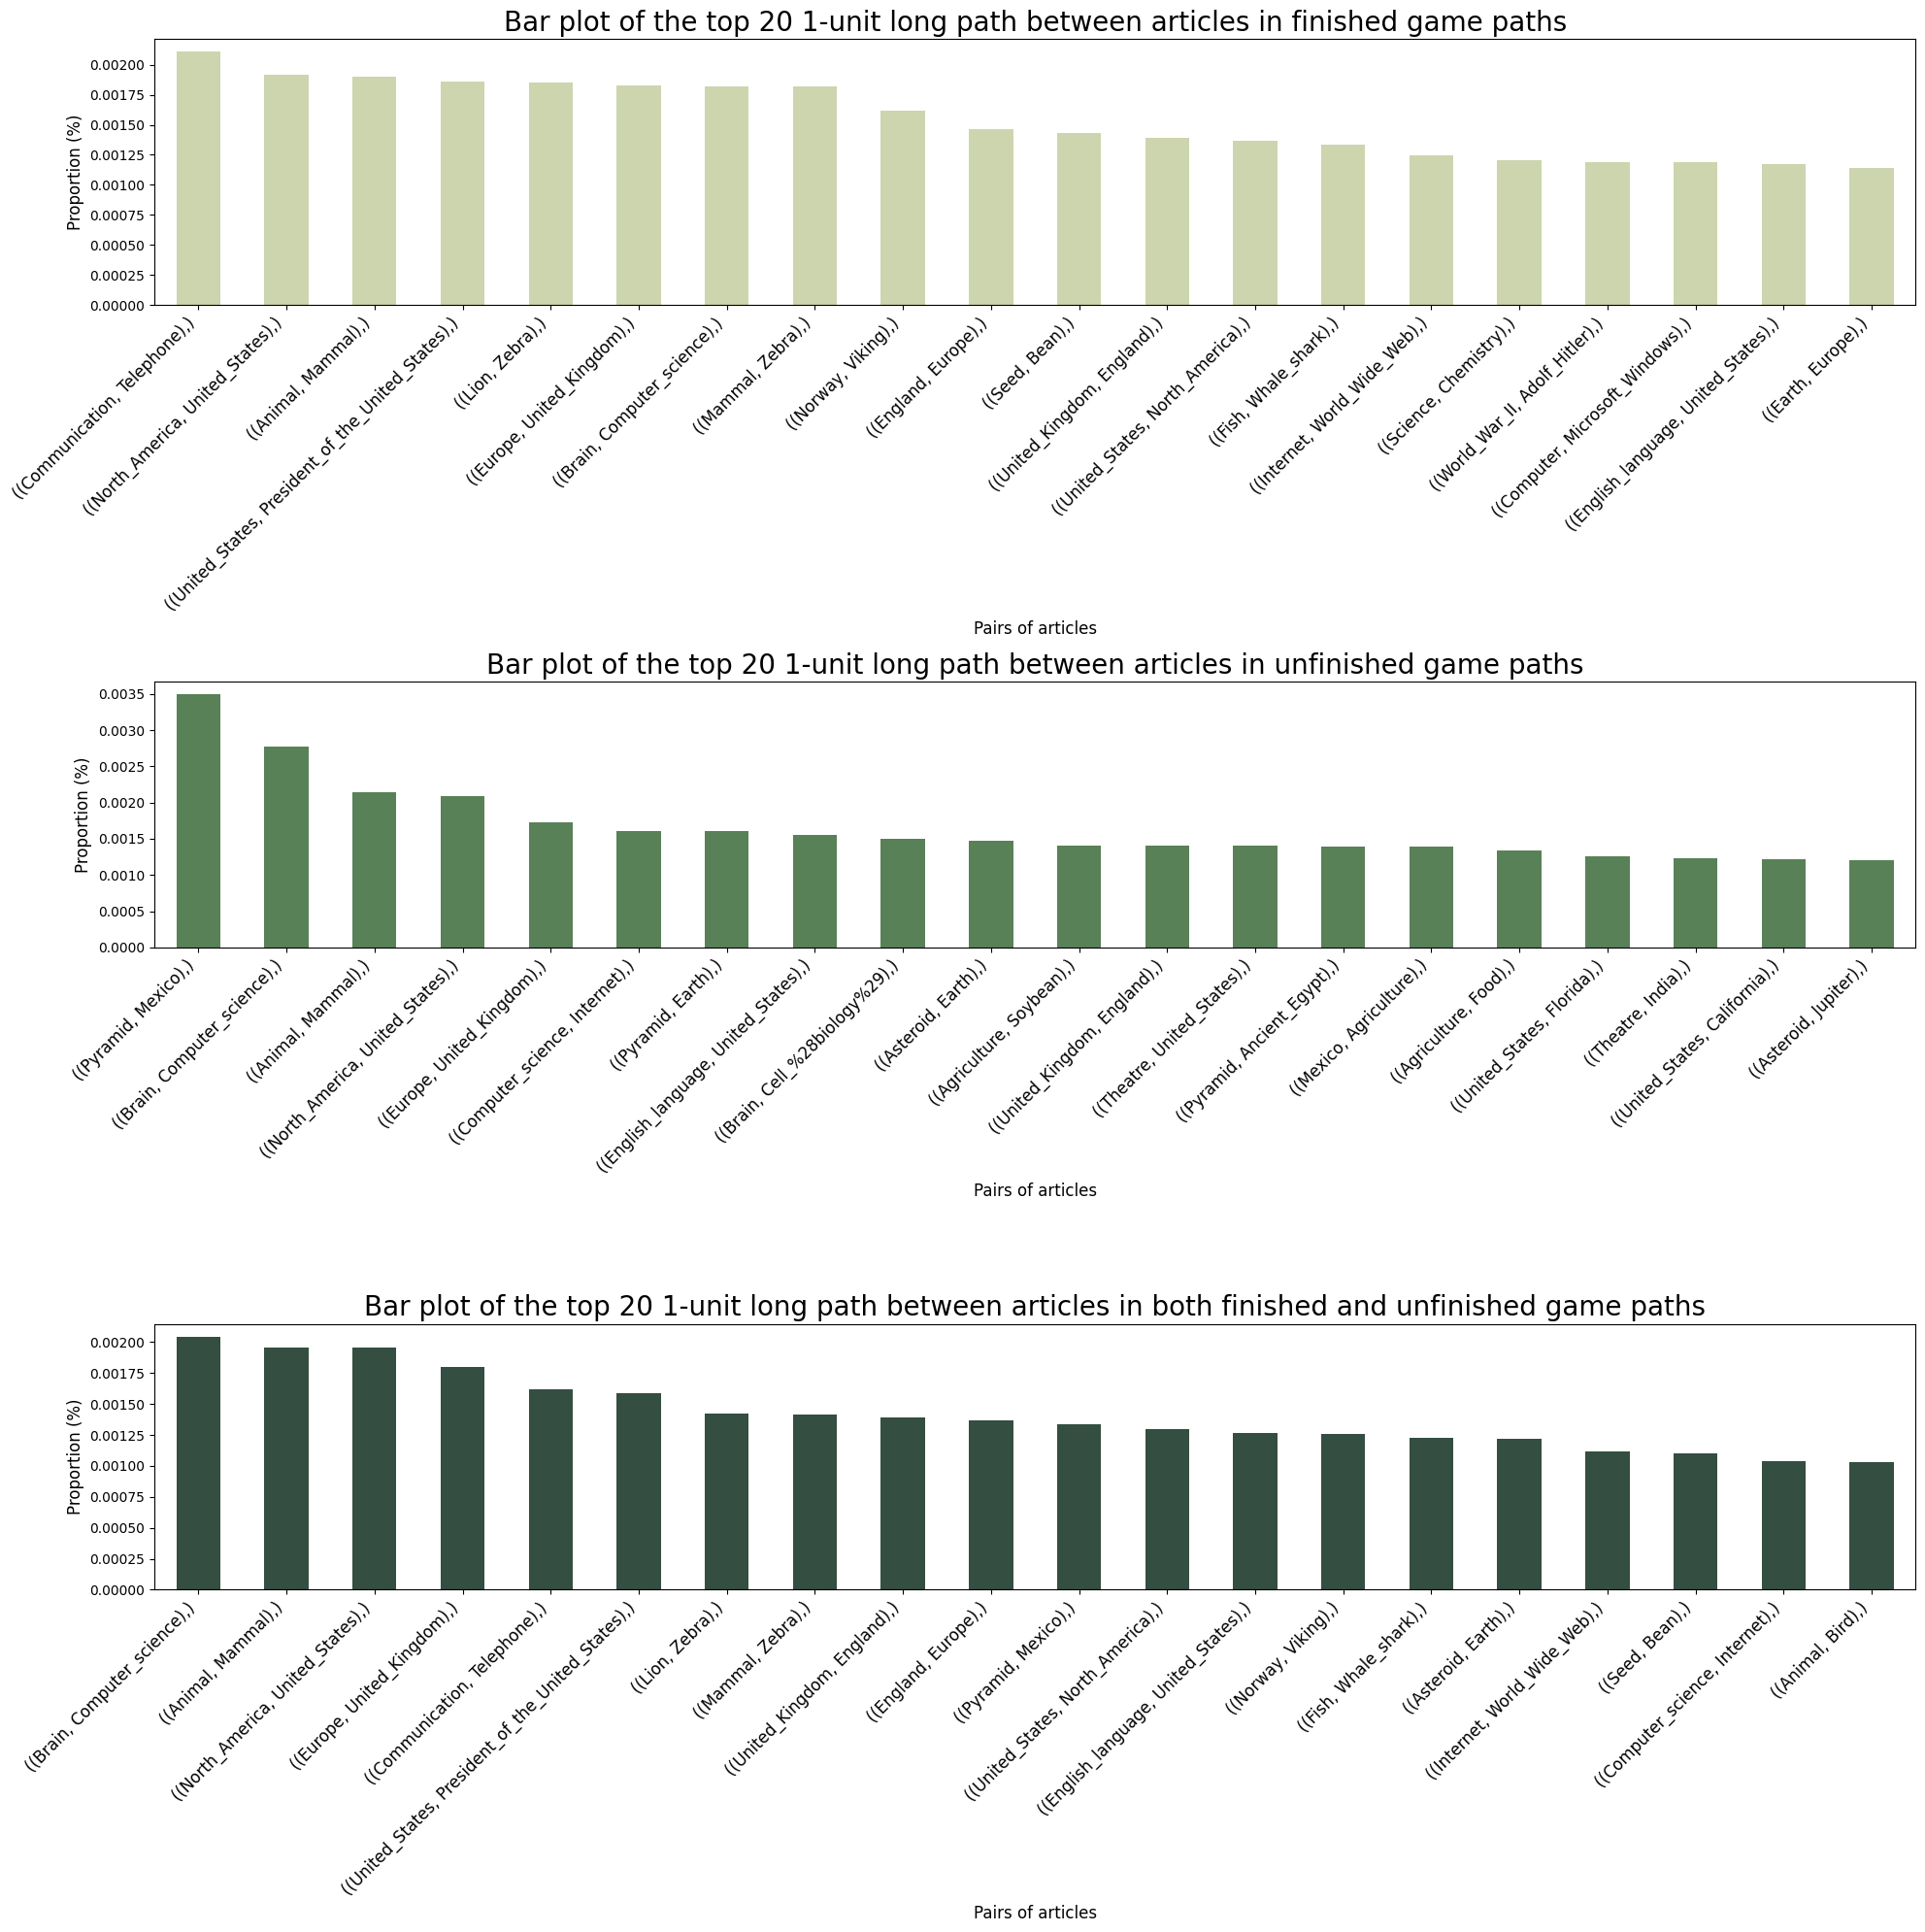

In [49]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
top20_finished.plot(kind='bar', width= 0.5, color='#ccd5ae')
plt.title('Bar plot of the top 20 1-unit long path between articles in finished game paths', fontsize=20)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)

plt.subplot(3, 1, 2)
top20_unfinished.plot(kind='bar', width= 0.5, color='#588157')
plt.title('Bar plot of the top 20 1-unit long path between articles in unfinished game paths', fontsize=20)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)

plt.subplot(3, 1, 3)
top20_merged.plot(kind='bar', width= 0.5, color='#344e41')
plt.title('Bar plot of the top 20 1-unit long path between articles in both finished and unfinished game paths', fontsize=20)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)

plt.tight_layout()
plt.show()

After realizing that the number of occurences per pair is extremelly small compared to the total number of pair found, we decided to normalize the number of occurences. Even the top 1 correponds to only 0.2 to 0.3% 

Not exactly the same paths are the most taken in finished vs unfinished paths

## Associate articles to their country

In [ ]:
# Divide pairs into 2 columns 'From' and 'To'

# Merge once with country_occurences.csv?

## Visualization of highway paths on a map

In [ ]:
# Plotly express has a function px.line_geo

## Test for 2-unit long paths

In [50]:
all_paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])
paths_merged = all_paths.apply(lambda row: row.split(';'))

In [51]:
all_trios_merged = []

# itérer sur toutes les lignes de finished_paths
for i in range(len(paths_merged)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(paths_merged.iloc[i])):
        if paths_merged.iloc[i][j] != '<': 
            new_row.append(paths_merged.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b, c), (b,c, d)]
    trios_row = [(new_row.iloc[j], new_row.iloc[j+1], new_row.iloc[j+2]) for j in range(len(new_row) - 2)]


    # Trios found for each rows are combined in a unique list
    all_trios_merged = all_trios_merged + trios_row

In [52]:
# Sum on the number of occurences of each trio
all_trios_merged_df = pd.DataFrame({'2-unit long path': all_trios_merged})
all_trios_merged_df.value_counts()

2-unit long path                              
(Fish, Whale_shark, Shark)                        322
(Brain, Computer_science, Internet)               278
(Information, Communication, Telephone)           245
(Animal, Mammal, Zebra)                           237
(Film, Animation, The_Lion_King)                  195
                                                 ... 
(10th_century, Byzantine_Empire, Heraclius)         1
(10th_century, Byzantine_Empire, Iraq)              1
(10th_century, Byzantine_Empire, Roman_Empire)      1
(10th_century, Dark_Ages, 15th_century)             1
(%C3%85land, Baltic_Sea, Atlantic_Ocean)            1
Name: count, Length: 158497, dtype: int64

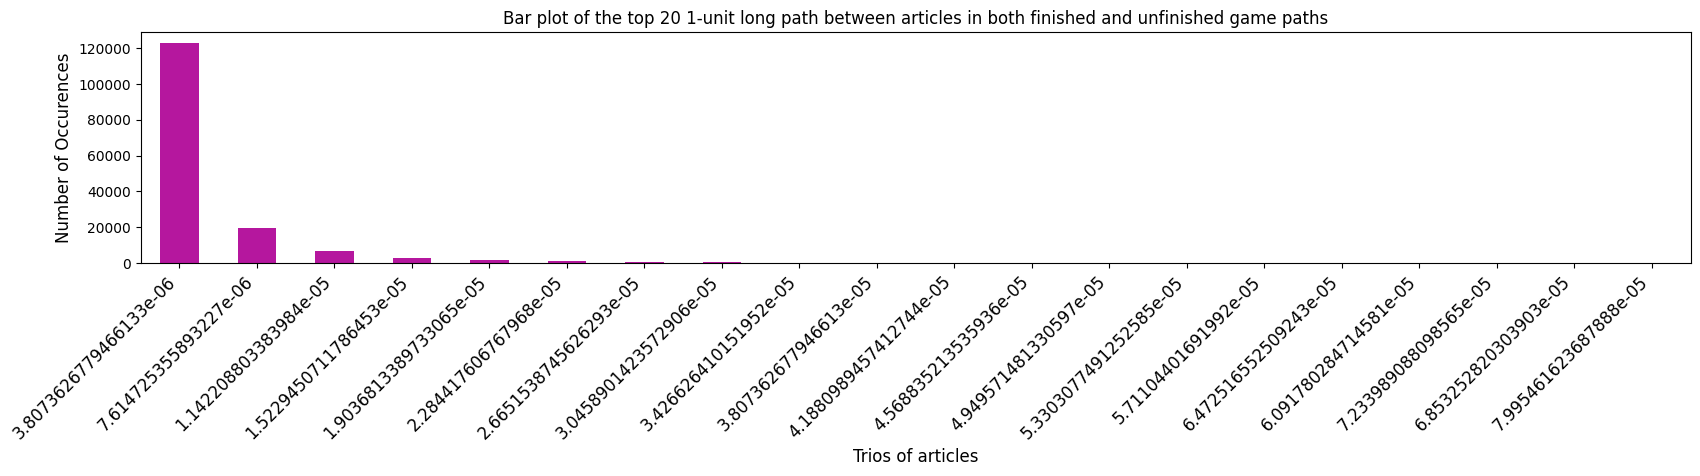

In [54]:
# Barplot of the top20 trio in both finished and unifinished paths 
all_trio_merged_normalized = all_trios_merged_df.value_counts() / all_trios_merged_df.value_counts().sum()
top20_trio_merged = all_trio_merged_normalized.value_counts().head(20)

plt.figure(figsize=(20, 3))
top20_trio_merged.plot(kind='bar', width= 0.5, color='#b5179e')
plt.title('Bar plot of the top 20 1-unit long path between articles in both finished and unfinished game paths', fontsize=12)
plt.xlabel('Trios of articles', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.show()